In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

np.random.seed = 42

In [67]:
G = 1  # Gravitational constant
c = 1  # Speed of light

[[ 0.98632792  0.99562943]
 [-0.62676788  0.95025864]
 [ 0.99473743 -0.23814329]
 [ 0.02964157  0.67260565]
 [-0.19734444  0.22243184]
 [ 0.7270121  -0.51703129]
 [ 0.11370547 -0.61244394]
 [-0.56022177  0.42642145]
 [ 0.86968663  0.47509202]
 [ 0.46486725  0.38509581]]
[0.28016443 0.27599163]


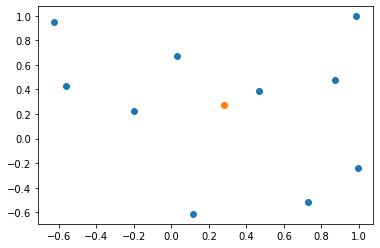

In [100]:
# Randomly distribute microlenses
N = 10
x = np.random.uniform(low=-1, high=1, size=N)
y = np.random.uniform(low=-1, high=1, size=N)

X = np.stack((x, y), axis=1)  # Lens positions
M = np.ones(N)  # Lens Masses

print(X)
CoM = np.average(X, axis=0, weights=M)

# ndimage.center_of_mass(X)  # Determine the center of mass of the distribution.
print(CoM)

plt.scatter(x, y)
plt.scatter(*CoM)

In [70]:
X[:, 1].shape

(1, 2)

In [63]:
def deflection_angle_point_masses(X, M):
    return 0

In [ ]:
def center_of_mass(X, M):


In [97]:
x = np.array((0, 2))
y = np.array((1, 3))
X = np.stack((x, y), axis=1)
M = np.array((1, 2))

In [98]:
print(X)
print(M)
print(np.average(X, axis=0, weights=M))

[[0 1]
 [2 3]]
[1 2]
[1.33333333 2.33333333]
